# Prediction using Supervised Machine learning

Predicting the marks from the number of hours studied by students.

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading the data
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Students who studied for average number of 5 hours, those obtained 50% marks.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

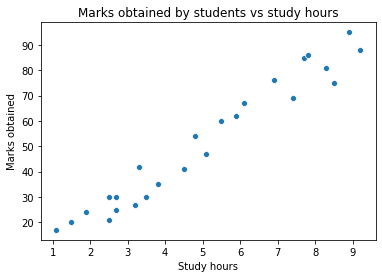

In [6]:
sns.scatterplot(x='Hours',y='Scores', data=data)
plt.title('Marks obtained by students vs study hours')
plt.xlabel('Study hours')
plt.ylabel('Marks obtained')
plt.show()

# Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [8]:
x=data.drop(['Scores'],axis=1)
y=data['Scores']

In [9]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (18, 1)
y_train shape: (18,)


In [13]:
print("The coefficient of linear regression is: {}".format(lr.coef_))
print("The intercept is: {}".format(lr.intercept_))

The coefficient of linear regression is: [9.94167834]
The intercept is: 1.932204253151646


In [20]:
line_eq=lr.coef_*x+lr.intercept_
line=round(line_eq)
line.head()

,Hours
0,27.0
1,53.0
2,34.0
3,86.0
4,37.0


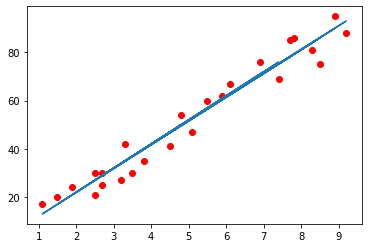

In [15]:
plt.scatter(x,y,color='red')
plt.plot(x,line)
plt.show()

In [17]:
pred_y_test=lr.predict(x_test)
pred_y_test

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

# Comparing acutal and predicted scores

In [19]:
df=pd.DataFrame({'Actual scores':y_test,'Predicted scores':pred_y_test})
df

,Actual scores,Predicted scores
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [31]:
y_pred=lr.predict([[9.25]])
print("The predicted score of student who study for 9.25 hrs/day is: {}".format(y_pred))

The predicted score of student who study for 9.25 hrs/day is: [93.89272889]


# Lets evaluate the performance of our model

In [33]:
print("Accuracy on training set: {:.2f}".format(lr.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(lr.score(x_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.94


As we can see that our training and test set accuracies are good. It means our model is good for predicting scores.